### Medical Cost Personal Insurance Project

### Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .


#### Columns                                            
•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, 

objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance


### Predict : Can you accurately predict insurance costs?

### Dataset Link-

https://github.com/dsrscientist/dataset4/blob/main/medical_cost_insurance.csv


In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# let's check the number of rows and columns in the dataset

df.shape

(1338, 7)

We have 1338 rows and 7 columns in the dataset.

In [4]:
# Some more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From the above, we can see that the dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.

In [5]:
# let's check the descriptive statistics of the variables

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can look at the descriptive statistical measures of the continuous data available in the dataset.

### Exploratory Data Analysis

In [6]:
# Checking  of missing values

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
# Checking the total number of missing values

df.isnull().sum().sum()

0

We do not have any missing values and won't have to drop any variables.

In [8]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'under-weight'
    elif bmi >= 18.5 and bmi <= 24.9:
        return 'normal-weight'
    elif bmi >= 24 and bmi <= 29.9:
        return 'over-weight'
    elif bmi > 30.0:
        return "obese"

def age_category(age):
    age_dict = {0: '0-9',1: '10-19',2: '20-29',3: '30-39',4: '40-49',5: '50-59',6: '60-69',7: '70-79',8:
                '80-89',9: '90-99',10: '100-200'}
    return age_dict[age//10]

In [9]:
df['cbmi'] = df['bmi'].map(bmi_category)
df['cage'] = df['age'].map(age_category)

In [10]:
by_age = df.groupby(by='cage').size()
print (by_age)
print ('-'*20)

by_sex = df.groupby(by='sex').size()
print (by_sex)
print ('-'*20)

by_smoker = df.groupby(by='smoker').size()
print (by_smoker)
print ('-'*20)

by_region = df.groupby(by='region').size()
print (by_region)
print ('-'*20)

by_children = df.groupby(by='children').size()
print (by_children)
print ('-'*20)

by_bmi = df.groupby(by='cbmi').size()
print (by_bmi)
print ('-'*20)

cage
10-19    137
20-29    280
30-39    257
40-49    279
50-59    271
60-69    114
dtype: int64
--------------------
sex
female    662
male      676
dtype: int64
--------------------
smoker
no     1064
yes     274
dtype: int64
--------------------
region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64
--------------------
children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64
--------------------
cbmi
normal-weight    222
obese            705
over-weight      380
under-weight      20
dtype: int64
--------------------


understand correlation between the input or the independent variables, I classified the ages and BMI into specific categories. The above analysis shows the stats like number of male and female, smokers and non-smokers, etc. from the input data.

Input data contains an even distribution of male and female samples.

Majority of them are non-smokers with 1064 samples.

A major sample of input data contains persons with no children with 574.

The data is evenly distributed across 4 regions.

### Describe Data

In [11]:
# Feature Engineering weight_status

df['weight_status'] = np.where(df['bmi'] < 18.000, 'underweigth',
                               np.where(df['bmi'] < 25.000, 'normal',
                                       np.where(df['bmi'] < 30.000, 'overweight', 'obese')))
df

,age,sex,bmi,children,smoker,region,charges,cbmi,cage,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,over-weight,10-19,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese,10-19,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese,20-29,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal-weight,30-39,normal
4,32,male,28.880,0,no,northwest,3866.85520,over-weight,30-39,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese,50-59,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese,10-19,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese,10-19,obese
1336,21,female,25.800,0,no,southwest,2007.94500,over-weight,20-29,overweight


In [12]:
# Separating Categorical & Numerical Values
cats = ['sex', 'smoker', 'region', 'weight_status']
nums = ['age', 'bmi', 'children', 'charges']
ver = ['sex','smoker','region','cage','cbmi','children']

In [13]:
# Describe Categorical Values

df[cats].describe()

,sex,smoker,region,weight_status
count,1338,1338,1338,1338
unique,2,2,4,4
top,male,no,southeast,obese
freq,676,1064,364,707


In [14]:
# Describe Numerical Values

df[nums].describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Visual Approach

#### Data Distribution Analysys

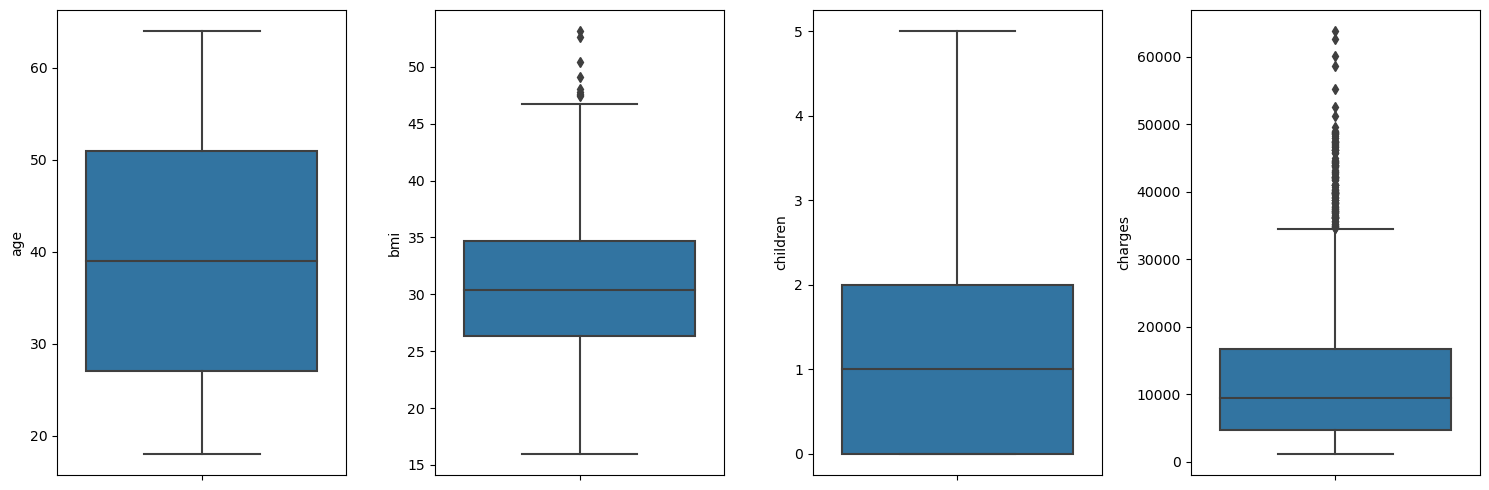

In [15]:
# Boxplot Visual

plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.boxplot(y = df[nums[i]])
    plt.tight_layout()

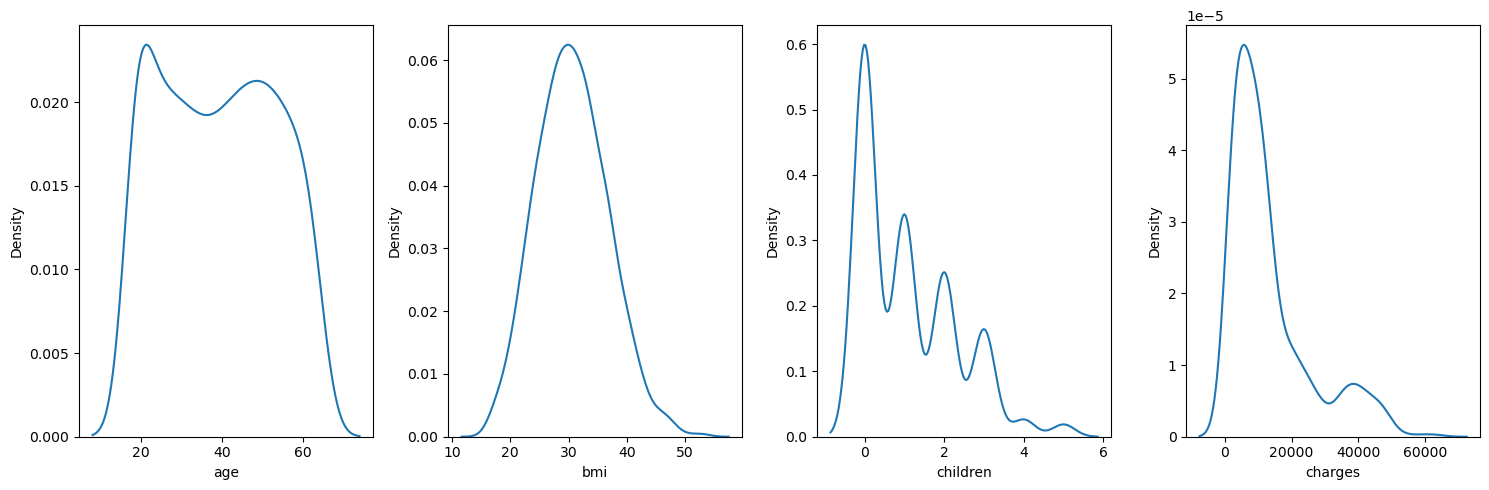

In [16]:
# KDEplot Visual

plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i + 1)
    sns.kdeplot(x = df[nums[i]])
    plt.tight_layout()

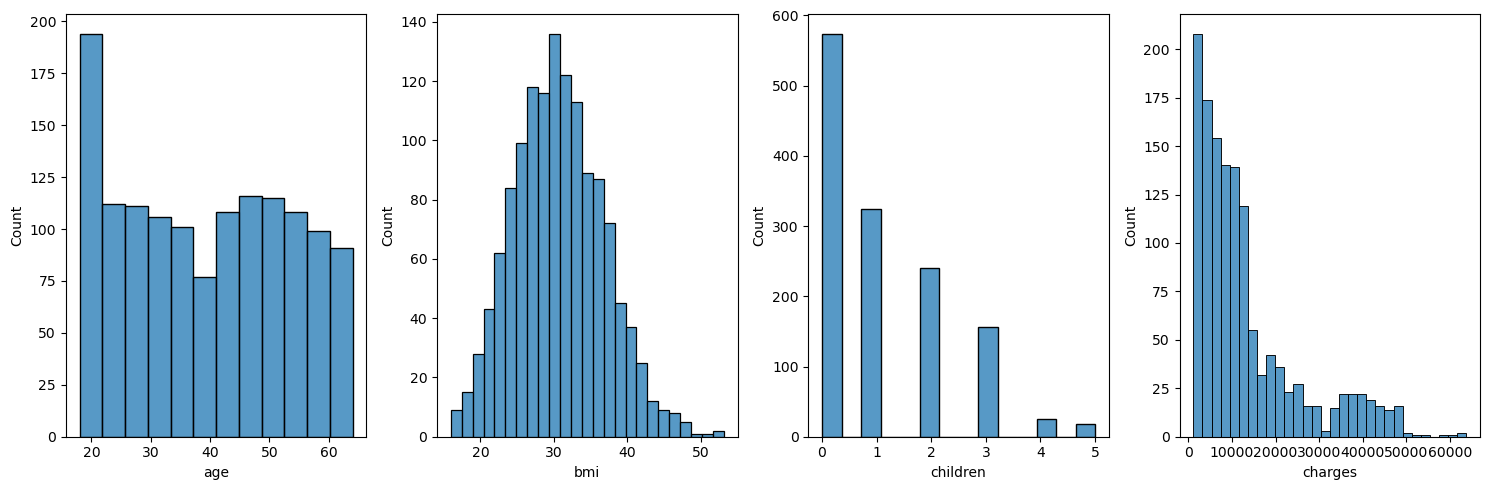

In [17]:
# Histplot Visual

plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i +1)
    sns.histplot(data = df[nums[i]])
    plt.tight_layout()

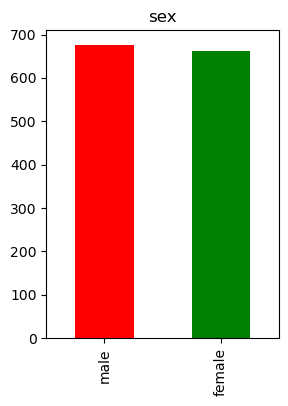

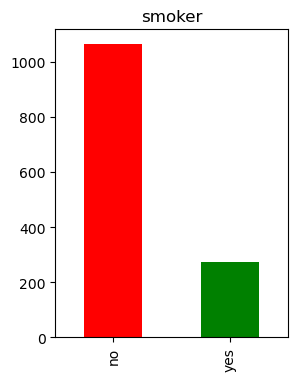

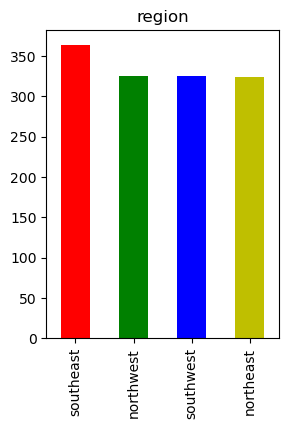

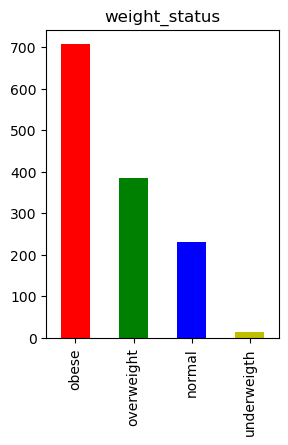

In [18]:
#Countplot Visual


for i in cats:
    fig,ax=plt.subplots(figsize=(3,4))
    data = df.sort_values(by=[i])
    data[i].value_counts().plot(kind = 'bar',color = ['r','g','b','y'])
    plt.title(i)
    plt.show()

### Mean cost analysys

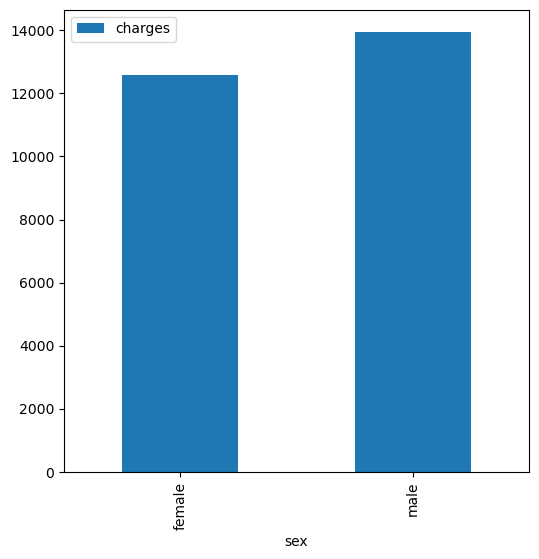

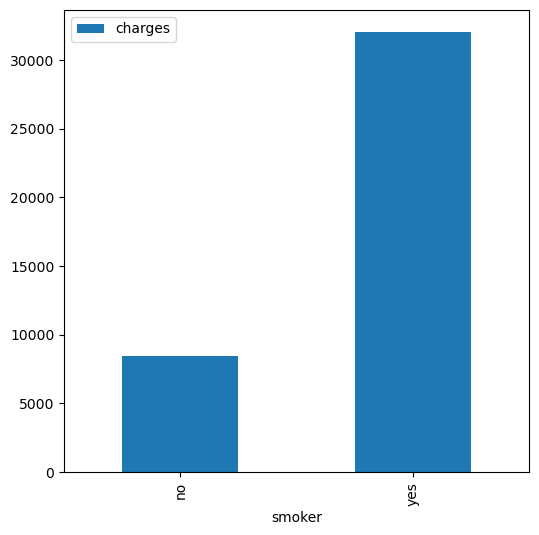

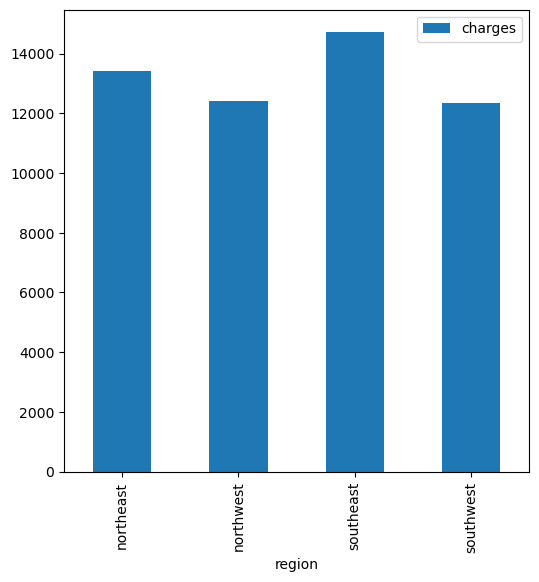

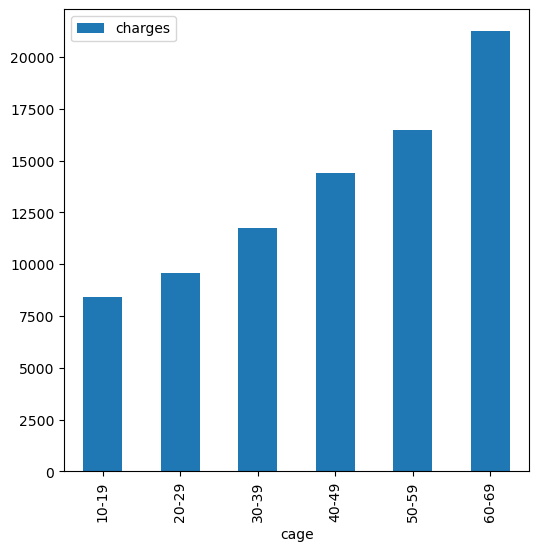

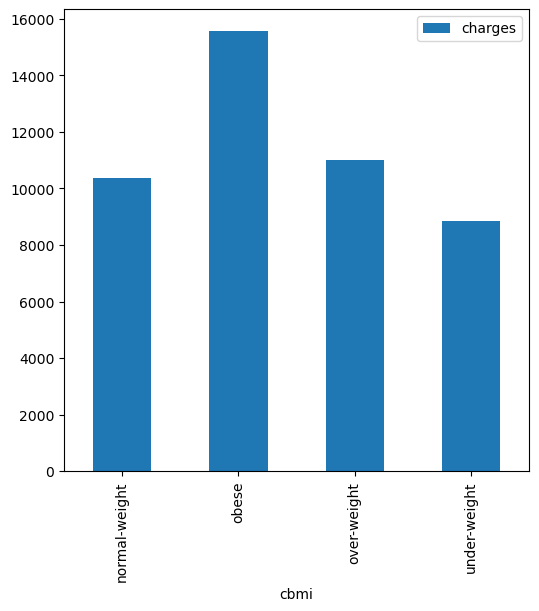

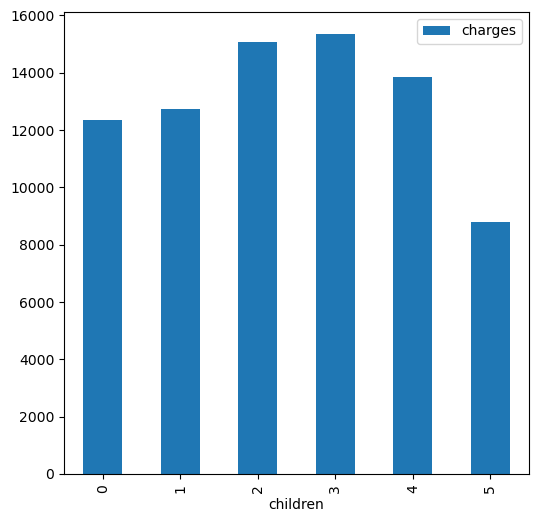

In [19]:
# mean cost Analysis

for i in ver:
    
    group_df = data.groupby(pd.Grouper(key=i)).mean()
    group_df = group_df.sort_index()
    group_df.plot(y = ['charges'],kind='bar',figsize=(6,6))
    
    plt.show()

From the above bar graphs, we can deduce the below facts.

Insurance costs are higher among male population

Insurance costs are highest among the population of age groups 60-69.

Insurance costs increases among the smokers

Insurance costs are higher among the population in southwest regionSurprisingly, 

insurance costs are higher among the individuals with 2 or 3 children rather than with individuals with 4 or 5 children

<Axes: >

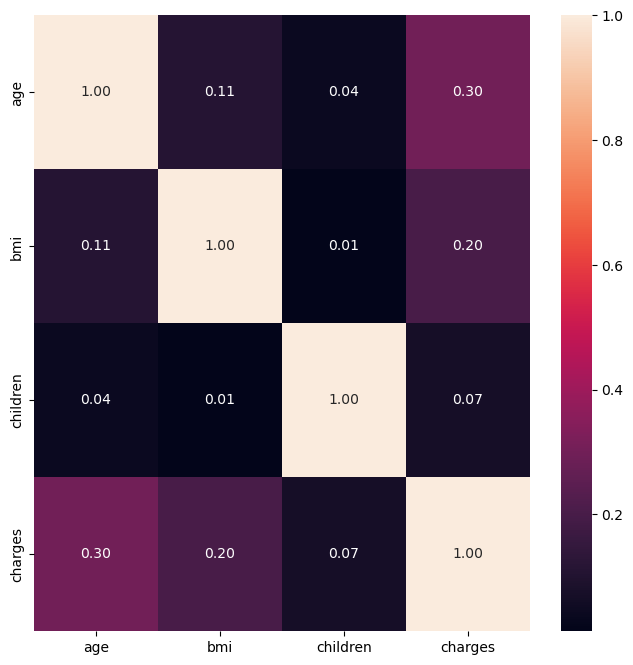

In [20]:
# Heatmap Correlation

plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

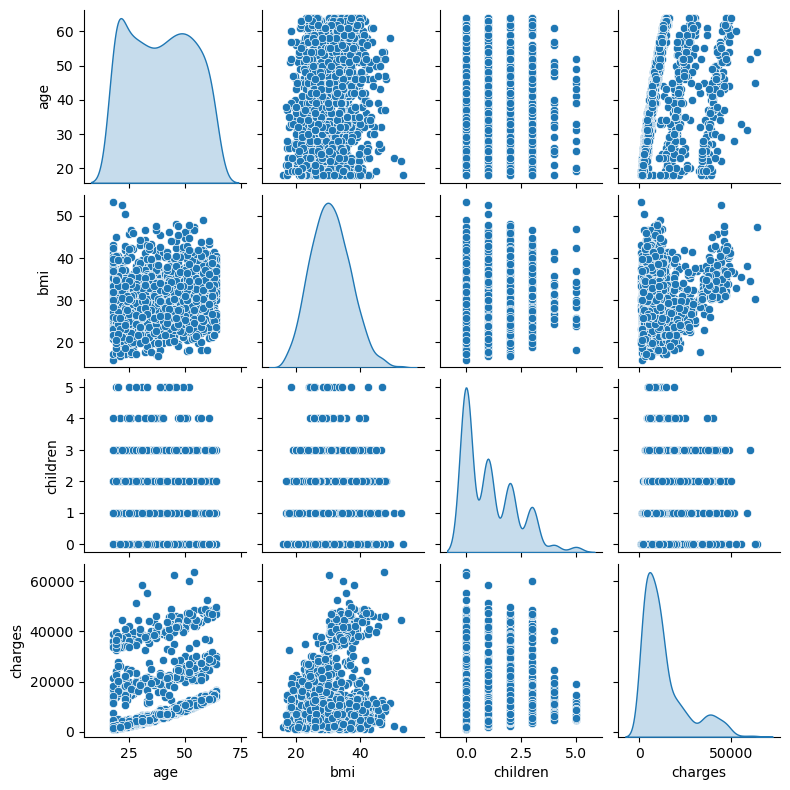

In [21]:
# Pairplot Visualization

sns.pairplot(df, diag_kind='kde',height=2)

### Scatterplot

<Axes: xlabel='bmi', ylabel='charges'>

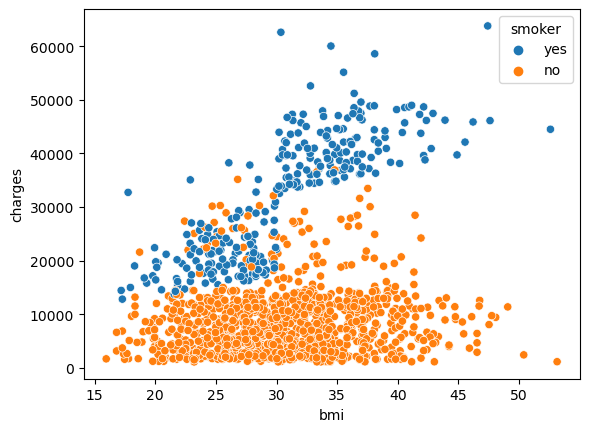

In [21]:
# Scatterplor Visualization

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)

<Axes: xlabel='age', ylabel='charges'>

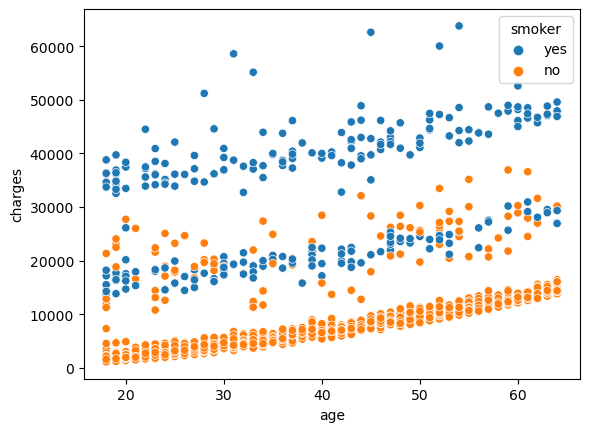

In [22]:
# Scatterplor Visualization

sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = df)

### Barplot

In [23]:
# Charges per Region

region_charges = df.groupby(['region']).agg({'charges' : sum}).reset_index()
region_charges.sort_values(['charges'], ascending = False)

,region,charges
2,southeast,5.363690e+06
0,northeast,4.343669e+06
1,northwest,4.035712e+06
3,southwest,4.012755e+06


<Axes: xlabel='region', ylabel='charges'>

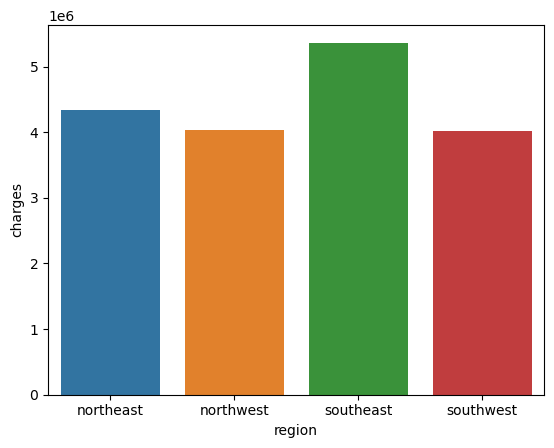

In [24]:
# Barplot Charges per Region

sns.barplot(x = 'region', y ='charges', data = region_charges)

<Axes: xlabel='region', ylabel='charges'>

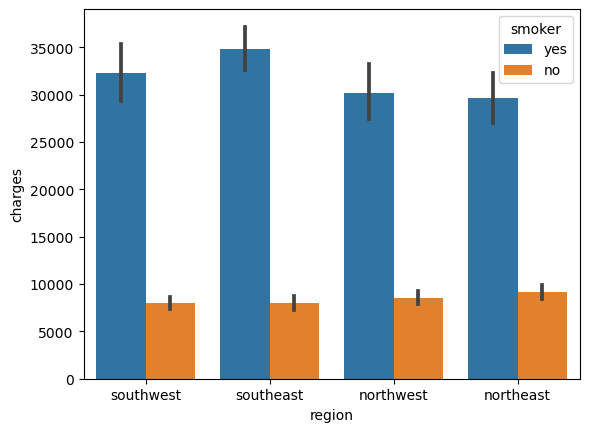

In [25]:
# Barplot with Hue Smoker

sns.barplot(x = df['region'], y = df['charges'], hue = df['smoker'], data = df)

<Axes: xlabel='region', ylabel='charges'>

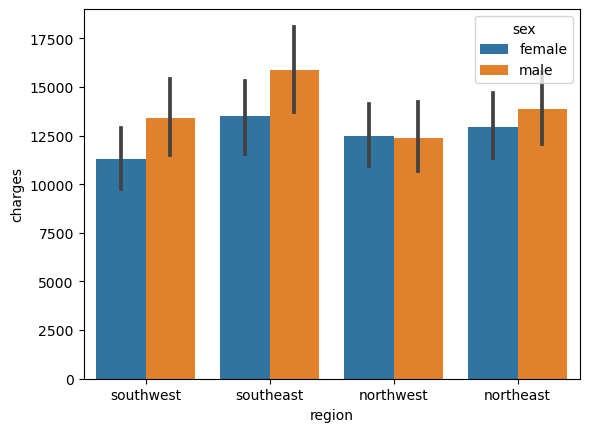

In [26]:
# Barplot with Hue Sex

sns.barplot(x = df['region'], y = df['charges'], hue = 'sex', data = df)

In [27]:
# Count Smoker with Sex Hue

smoker_sex = df.groupby(['smoker', 'sex']).agg({'charges' : 'count'}).reset_index()
smoker_sex.columns = ['smoker', 'sex', 'count']
smoker_sex.sort_values(['smoker', 'count'], ascending = False)

,smoker,sex,count
3,yes,male,159
2,yes,female,115
0,no,female,547
1,no,male,517


<Axes: xlabel='sex', ylabel='count'>

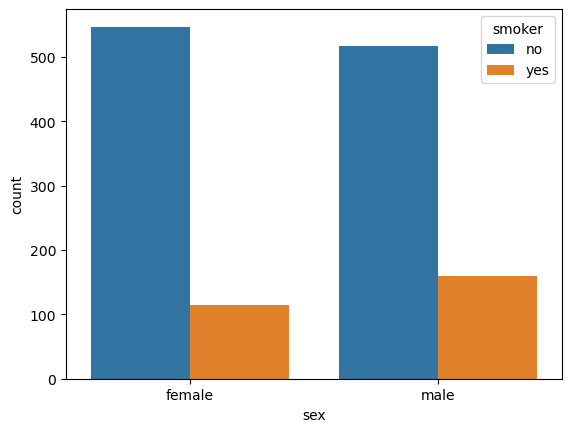

In [28]:
# Barplot Visualization

sns.barplot(x = smoker_sex['sex'], y = smoker_sex['count'], hue = smoker_sex['smoker'], data = smoker_sex)

<Axes: xlabel='children', ylabel='charges'>

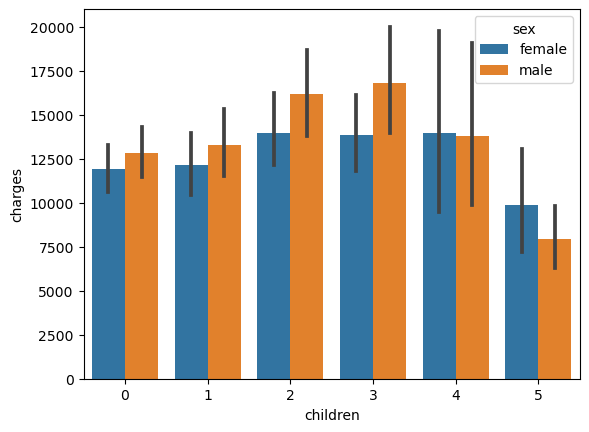

In [29]:
# Barplot with Hue Sex

sns.barplot(x = df['children'], y = df['charges'], hue = df['sex'], data = df)

<Axes: xlabel='children', ylabel='charges'>

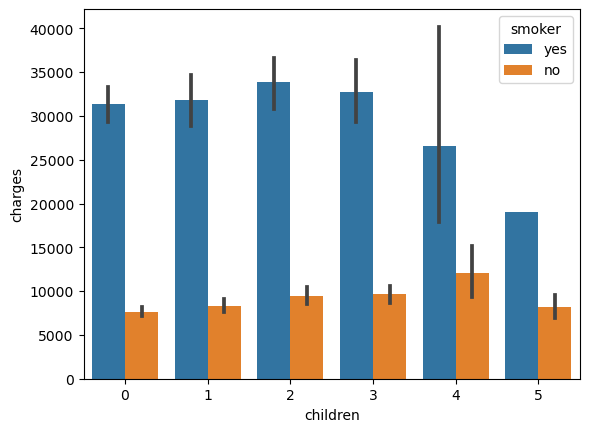

In [30]:
# Barplot with Hue Smoker

sns.barplot(x = df['children'], y = df['charges'], hue = df['smoker'], data = df)

In [31]:
# Count Weight_Status with Hue Smoker

smoker_status = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'count')
smoker_status

,weight_status,smoker,count
0,normal,no,179
1,normal,yes,51
2,obese,no,562
3,obese,yes,145
4,overweight,no,312
5,overweight,yes,74
6,underweigth,no,11
7,underweigth,yes,4


<Axes: xlabel='weight_status', ylabel='count'>

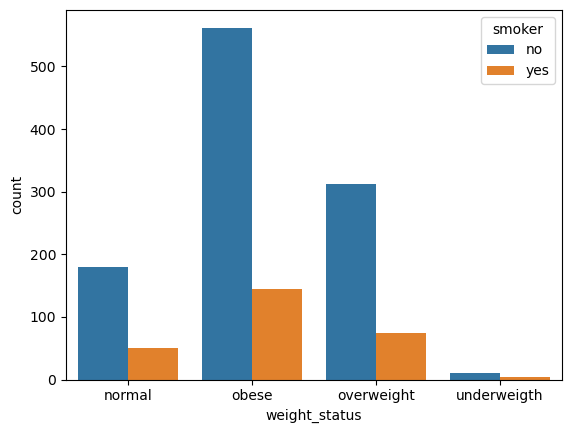

In [32]:
# Barplot Smoker_Status

sns.barplot(x = 'weight_status', y = 'count', hue = 'smoker', data = smoker_status)

In [33]:
# Count Weight_Status with Hue Smoker

smoker_status = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'sum'}).reset_index()
smoker_status.columns = ('weight_status', 'smoker', 'charges')
smoker_status 

,weight_status,smoker,charges
0,normal,no,1.389364e+06
1,normal,yes,1.016134e+06
2,obese,no,4.969593e+06
3,obese,yes,6.025909e+06
4,overweight,no,2.576484e+06
5,overweight,yes,1.664695e+06
6,underweigth,no,3.862044e+04
7,underweigth,yes,7.502586e+04


In [34]:
# Insurance Cost based on Weight_Status and smoker

smoker_status_charges = df.groupby(['weight_status', 'smoker']).agg({'charges' : 'count'}).reset_index()
smoker_status_charges.columns = ['weight_status', 'smoker', 'count']
smoker_status_charges['total'] = smoker_status_charges.groupby(['weight_status'])['count'].transform('sum')
smoker_status_charges

,weight_status,smoker,count,total
0,normal,no,179,230
1,normal,yes,51,230
2,obese,no,562,707
3,obese,yes,145,707
4,overweight,no,312,386
5,overweight,yes,74,386
6,underweigth,no,11,15
7,underweigth,yes,4,15


<Axes: xlabel='weight_status', ylabel='count'>

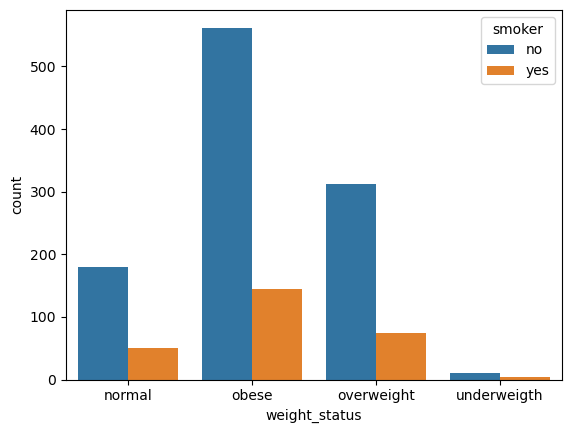

In [35]:
# Barplot Smoker_Status_Charges

sns.barplot(x = 'weight_status', y = 'count', hue = 'smoker', data = smoker_status_charges)

In [36]:
# Merge Columns
condition_cost = smoker_status.merge(smoker_status_charges, 
                   left_on = ['weight_status', 'smoker'],
                    right_on = ['weight_status', 'smoker'],
                    how = 'inner')
condition_cost

,weight_status,smoker,charges,count,total
0,normal,no,1.389364e+06,179,230
1,normal,yes,1.016134e+06,51,230
2,obese,no,4.969593e+06,562,707
3,obese,yes,6.025909e+06,145,707
4,overweight,no,2.576484e+06,312,386
5,overweight,yes,1.664695e+06,74,386
6,underweigth,no,3.862044e+04,11,15
7,underweigth,yes,7.502586e+04,4,15


In [37]:
# Average Charges
condition_cost['avg_charges'] = condition_cost['charges'] / condition_cost['count']
condition_cost

,weight_status,smoker,charges,count,total,avg_charges
0,normal,no,1.389364e+06,179,230,7761.811458
1,normal,yes,1.016134e+06,51,230,19924.204746
2,obese,no,4.969593e+06,562,707,8842.691548
3,obese,yes,6.025909e+06,145,707,41557.989840
4,overweight,no,2.576484e+06,312,386,8257.961955
5,overweight,yes,1.664695e+06,74,386,22495.874163
6,underweigth,no,3.862044e+04,11,15,3510.948941
7,underweigth,yes,7.502586e+04,4,15,18756.466225


<Axes: xlabel='weight_status', ylabel='avg_charges'>

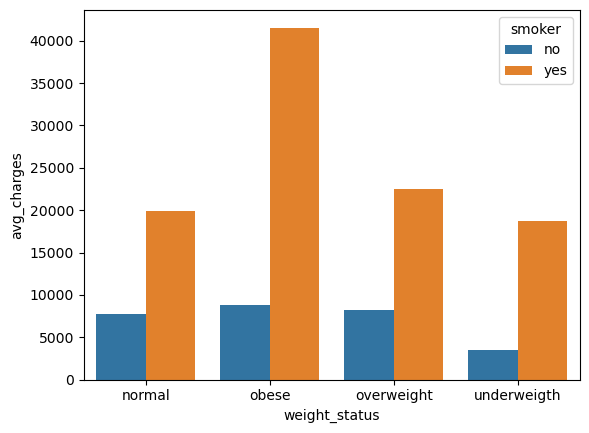

In [38]:
# Average Charges Barplot

sns.barplot(x = 'weight_status', y = 'avg_charges', hue = 'smoker', data = condition_cost)

Person who smoke have to pay more cost for insurance, obese person who smoke have the highest medical cost.

### Descriptive statistics about the insurance costs.

In [39]:
# Printing a summary of the numerical columns

print(data.describe().round(2))



           age      bmi  children   charges
count  1338.00  1338.00   1338.00   1338.00
mean     39.21    30.66      1.09  13270.42
std      14.05     6.10      1.21  12110.01
min      18.00    15.96      0.00   1121.87
25%      27.00    26.30      0.00   4740.29
50%      39.00    30.40      1.00   9382.03
75%      51.00    34.69      2.00  16639.91
max      64.00    53.13      5.00  63770.43


In [40]:
# Extracting the target column (insurance charges)
target = df['charges']

# Calculating some statistics on the target column
min_cost = np.min(target)
max_cost = np.max(target)
mean_cost = np.mean(target)
median_cost = np.median(target)
std_cost = np.std(target)

# Printing the calculated statistics
print("Statistics for Medical Insurance dataset:\n")
print(f"Minimum insurance cost:                {min_cost:,.2f}")
print(f"Maximum insurance cost:                {max_cost:,.2f}")
print(f"Mean insurance cost:                   {mean_cost:,.2f}")
print(f"Median insurance cost:                 {median_cost:,.2f}")
print(f"Standard deviation of insurance costs: {std_cost:,.2f}")

Statistics for Medical Insurance dataset:

Minimum insurance cost:                1,121.87
Maximum insurance cost:                63,770.43
Mean insurance cost:                   13,270.42
Median insurance cost:                 9,382.03
Standard deviation of insurance costs: 12,105.48


### Data Processing

In [41]:
# Check Missing Value

df.isna().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
cbmi             11
cage              0
weight_status     0
dtype: int64

In [42]:
# Check Duplicate Value

df.duplicated().sum()

1

In [43]:
# Remove Duplicate Value
df = df.drop_duplicates()

# Check Duplicate Value
df.duplicated().sum()

0

### Feature Transformation

In [44]:
# Copy DataFrame
df1 = df.copy()

In [45]:
#Ordinal Encoding
df1['smoker'] = df1['smoker'].replace({'yes' : 0, 'no' : 1})

#One Hot Encoding
sex_ori = pd.get_dummies(df1['sex'], prefix = 'sex')
region_ori = pd.get_dummies(df1['region'], prefix = 'reg')
status_ori = pd.get_dummies(df1['weight_status'], prefix = 'status')

#Concat Feature Encoding
df1 = pd.concat([df1, sex_ori], axis=1)
df1 = pd.concat([df1, region_ori], axis=1)
df1 = pd.concat([df1, status_ori], axis=1)

In [46]:
#Drop Encoded Feature

df1 = df1.drop(columns = ['sex', 'region', 'weight_status','cbmi','cage'])

#Check df
df1

,age,bmi,children,smoker,charges,sex_female,sex_male,reg_northeast,reg_northwest,reg_southeast,reg_southwest,status_normal,status_obese,status_overweight,status_underweigth
0,19,27.900,0,0,16884.92400,1,0,0,0,0,1,0,0,1,0
1,18,33.770,1,1,1725.55230,0,1,0,0,1,0,0,1,0,0
2,28,33.000,3,1,4449.46200,0,1,0,0,1,0,0,1,0,0
3,33,22.705,0,1,21984.47061,0,1,0,1,0,0,1,0,0,0
4,32,28.880,0,1,3866.85520,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,10600.54830,0,1,0,1,0,0,0,1,0,0
1334,18,31.920,0,1,2205.98080,1,0,1,0,0,0,0,1,0,0
1335,18,36.850,0,1,1629.83350,1,0,0,0,1,0,0,1,0,0
1336,21,25.800,0,1,2007.94500,1,0,0,0,0,1,0,0,1,0


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1337 non-null   int64  
 1   bmi                 1337 non-null   float64
 2   children            1337 non-null   int64  
 3   smoker              1337 non-null   int64  
 4   charges             1337 non-null   float64
 5   sex_female          1337 non-null   uint8  
 6   sex_male            1337 non-null   uint8  
 7   reg_northeast       1337 non-null   uint8  
 8   reg_northwest       1337 non-null   uint8  
 9   reg_southeast       1337 non-null   uint8  
 10  reg_southwest       1337 non-null   uint8  
 11  status_normal       1337 non-null   uint8  
 12  status_obese        1337 non-null   uint8  
 13  status_overweight   1337 non-null   uint8  
 14  status_underweigth  1337 non-null   uint8  
dtypes: float64(2), int64(3), uint8(10)
memory usage: 75.7 K

In [48]:
# Modelin Library

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

### Model Building

In [49]:
# Model Evaluation

def evaluation(model, prediction, xtrain, ytrain, xtest, ytest):
    print('MAE : %.2f' % mean_absolute_error(ytest, prediction)) # MAE
    print('RMSE : %.2f' % mean_squared_error(ytest, prediction, squared=False)) # RMSE
    print('R2 score : %.2f' % r2_score(ytest, prediction)) # R2 score
    print('Train Accuracy :', model.score(xtrain, ytrain)) # Train Accuracy
    print('Test Accuracy :', model.score(xtest, ytest)) # Test Accuracy

In [50]:
# Best Hyperparameter Evaluation

def best_hyperparameter(model, parameters):
    for key, value in parameters.items() :
        print('Best '+ key +':', model.get_params()[key])

In [51]:
# Best Feature Importance Evaluation

def feature_importance(model, x):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x.columns)
    ax = feat_importances.nlargest(10).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()
    
    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score')

In [52]:
# Separating Target & Features
x1 = df1.drop(columns = ['charges']) #Features
y1 = df1['charges'] #Target

In [53]:
# Splitting Train & Test 

x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.3, random_state = 42)

In [54]:
print(df1['charges'])

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [55]:
# Modeling Buliding

models = {
    'LinearRegression' : LinearRegression(),
    'DecisionTree'     : DecisionTreeRegressor(),
    'RandomForest'     : RandomForestRegressor(),
    'Ridge'            : Ridge(),
    'Lasso'            : Lasso()
}

for model_name, model in models.items():
    model.fit(x_train1, y_train1)
    prediction1 = model.predict(x_test1)
    print('Model: {}'.format(model_name))
    print(evaluation(model, prediction1, x_train1, y_train1, x_test1, y_test1), '\n')

Model: LinearRegression
MAE : 4305.31
RMSE : 6221.51
R2 score : 0.77
Train Accuracy : 0.7432025636860959
Test Accuracy : 0.7737981066498894
None 

Model: DecisionTree
MAE : 2788.56
RMSE : 6055.69
R2 score : 0.79
Train Accuracy : 1.0
Test Accuracy : 0.785695076485213
None 

Model: RandomForest
MAE : 2609.46
RMSE : 4792.97
R2 score : 0.87
Train Accuracy : 0.9760065006919725
Test Accuracy : 0.8657497529184194
None 

Model: Ridge
MAE : 4308.20
RMSE : 6232.52
R2 score : 0.77
Train Accuracy : 0.7431708958473923
Test Accuracy : 0.7729965688416807
None 

Model: Lasso
MAE : 4303.81
RMSE : 6221.33
R2 score : 0.77
Train Accuracy : 0.7432011171610504
Test Accuracy : 0.7738111971751117
None 



### Tuning Hyperparameter

In [56]:
LinearRegression().get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'positive'])

In [85]:
# List Hyperparameters

hyperparameters = dict(copy_X=[True,False],fit_intercept=[True,False],n_jobs=[-1,0,1,2])

#Initiation

LR1 = LinearRegression()
LR_tuned1 = RandomizedSearchCV(LR1, hyperparameters, cv=5, random_state=42, scoring='r2', n_iter=20)
LR_tuned1.fit(x_train1, y_train1)

# Predict & Evaluation

prediction1 = LR_tuned1.predict(x_test1)
evaluation(LR_tuned1, prediction1, x_train1, y_train1, x_test1, y_test1)

MAE : 4305.31
RMSE : 6221.51
R2 score : 0.77
Train Accuracy : 0.7432025636860959
Test Accuracy : 0.7737981066498894


### Conclusion

Exploratory Data Analysis

most people are a non smokers & obese

feature sex, region has an almost balanced amount

person who smoke & have a higher BMI, has higher medical charges

older people who smoke have more expensive charges

an obese person who smokes have higher charges

#### Modeling

Based on the predictive modeling, Linear Regression algorithm has the best score compared to the others, with MAE Score 4305.20, RMSE Score 6209.88, & R2 Score 0.77. Linear Regression algorithm is fit based on the train & test accuracy.